In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### Some initial predictions:

Sex will be the single biggest predictor of survival, followed by age   (young uns might not have survived)

Rich-ness may be a negative predictor of survival


Different considerations:
- did they get into a lifeboat                     --> age, sex, affluence
- did they go down with the ship                   --> age, location on ship
- were they able to tread water until being saved  --> age / stamina,

- How balanced are the two classes?

Features that will be useful:
- Age < 18   (Age < 13   Age < 10 , ...?)
- has family  (sibsp, parch columns)
- has children
- is rich --> pclass, higher passenger fare / which cabin / etc   (premium passenger)
    - >> correlate cabin with fare and pclass

- cabin number?  --> certain cabins may have been lower on the ship

Features that may be useful, or at least interesting:
- is married   (Mrs vs Miss,  sibsp column, what to do for men?  --> (sibsp column only?) )

- Age > 60,  Age > 70, etc


Features that may not be useful
- port of embark

In [111]:
df = pd.read_csv("data/train.csv", index_col=0)
print(df.columns)
df.head(5)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df['SexBinary'] = (df['Sex'] == 'female').astype(int)
df = pd.get_dummies(df, columns=['Sex'], dtype=int, prefix="is")

ports = {'S': 0, 'C': 1, 'Q': 2, np.nan: 3}
df['Embarked'] = df['Embarked'].map(lambda port: ports.get(port))

array([0, 1, 2, 3])

In [114]:
print(df.columns)
df.head()

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'SexBinary', 'is_female', 'is_male'],
      dtype='object')


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBinary,is_female,is_male
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,1


In [34]:
df[['Fare']].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [102]:
cmap = mcolors.LinearSegmentedColormap.from_list(
    "MWG",
    [(0.0, "magenta"), (0.5, "white"), (1.0, "green")]
)

norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

def corr_matrix(*args, **kwargs):
    return sns.heatmap(*args, **kwargs,  norm=norm,
                       cmap=cmap,vmin=-1,vmax=1,center=0,cbar=True)

|## Feature Engineering

In [36]:
df['is_child'] = (df['Age'] < 18).astype(int)
df['is_senior'] = (df['Age'] >= 60).astype(int)
df['has_family'] = ((df['SibSp'] > 0) | (df['Parch'] > 0)).astype(int)
df['is_rich'] = ((df['Pclass'] == 1) | (df['Fare'] > 31)).astype(int)

In [115]:
df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'Survived']).corr()

,Pclass,Age,SibSp,Parch,Fare,SexBinary,is_female,is_male
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,-0.131900,0.131900
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,-0.093254,0.093254
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,0.114631,-0.114631
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,0.245489,-0.245489
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.182333,-0.182333
SexBinary,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,1.000000,-1.000000
is_female,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,1.000000,-1.000000
is_male,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,-1.000000,1.000000


<Axes: >

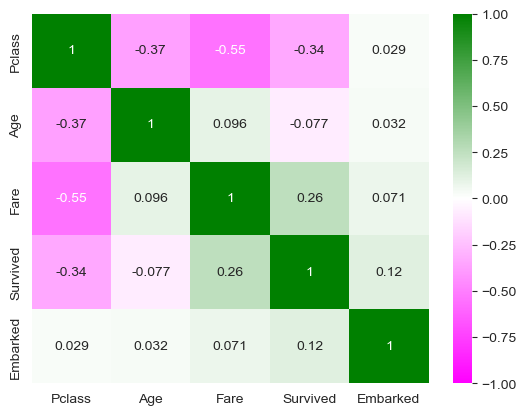

In [116]:
corr_matrix(df[['Pclass', 'Age', 'Fare', 'Survived', 'Embarked']].corr(), annot=True)#with(df['Survived']), annot=True)

In [55]:
df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'Survived']).corrwith(df['Survived']).to_frame('Correlation')

,Correlation
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
SexBinary,0.543351
is_female,0.543351
is_male,-0.543351
is_child,0.122239
is_senior,-0.040857


<Axes: >

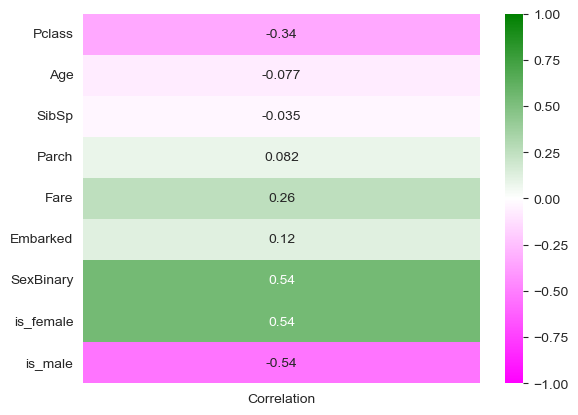

In [117]:
corr_matrix(
    df.drop(columns=['Name', 'Ticket', 'Cabin', 'Survived']).corrwith(df['Survived']).to_frame('Correlation'),
    annot=True, #vmin=-1, vmax=1, cmap="PiYG"
)